SUMMARY REPORT
Total Invoices: 1000
Total Invoice Amount: ₹ 254570826.5
Total Paid Amount: ₹ 172528368.02
Total Overdue Amount: ₹ 82042458.47999999
Average Overdue Days: 19.14 days


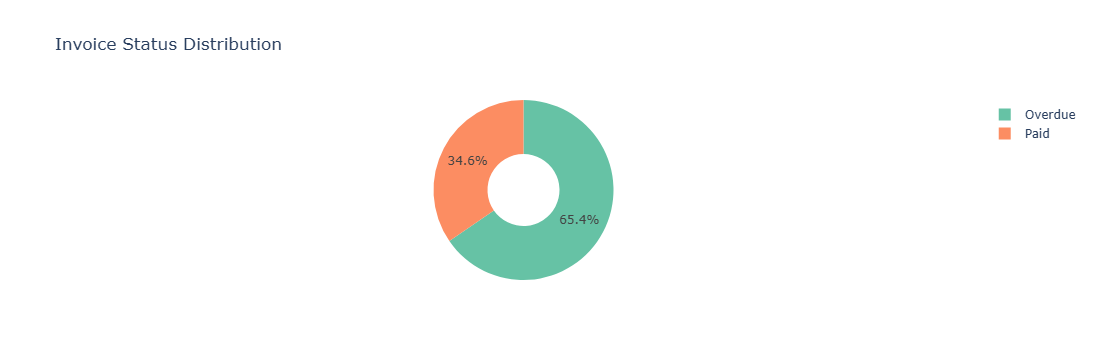

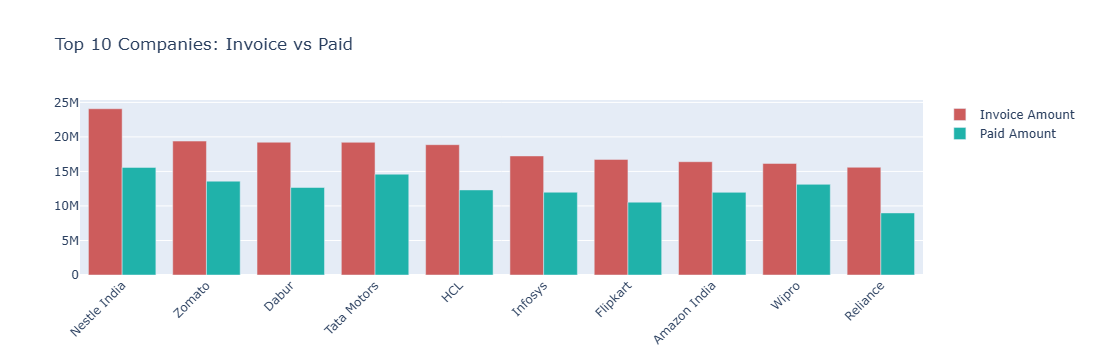

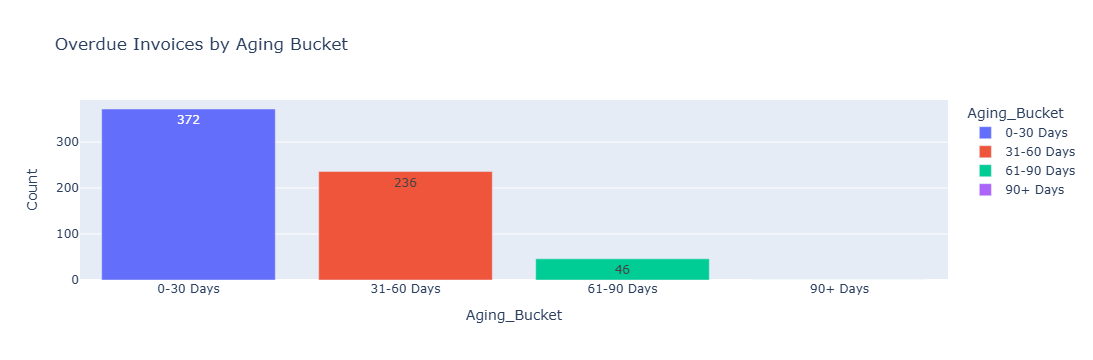

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load data
df = pd.read_csv("credit_control_analysis_1000rows.csv")

# Convert to datetime
df["Invoice_Date"] = pd.to_datetime(df["Invoice_Date"])
df["Due_Date"] = pd.to_datetime(df["Due_Date"])
df["Payment_Date"] = pd.to_datetime(df["Payment_Date"])

# Create derived columns
df["Month"] = df["Invoice_Date"].dt.to_period("M").astype(str)
df["Overdue_Amount"] = df["Invoice_Amount"] - df["Paid_Amount"]
df["Aging_Bucket"] = pd.cut(df["Overdue_Days"],
                            bins=[-1, 30, 60, 90, 9999],
                            labels=["0-30 Days", "31-60 Days", "61-90 Days", "90+ Days"])

# Summary report
print("SUMMARY REPORT")
print("Total Invoices:", len(df))
print("Total Invoice Amount: ₹", df["Invoice_Amount"].sum())
print("Total Paid Amount: ₹", df["Paid_Amount"].sum())
print("Total Overdue Amount: ₹", df["Overdue_Amount"].sum())
print("Average Overdue Days:", round(df["Overdue_Days"].mean(), 2), "days")

# 1. Invoice Status Pie Chart
fig1 = px.pie(df, names="Status", title="Invoice Status Distribution", hole=0.4,
              color_discrete_sequence=px.colors.qualitative.Set2)
fig1.show()

# 2. Invoice vs Paid (Top 10 Companies)
top10 = df.groupby("Company_Name")[["Invoice_Amount", "Paid_Amount"]].sum() \
          .sort_values("Invoice_Amount", ascending=False).head(10).reset_index()

fig2 = go.Figure()
fig2.add_trace(go.Bar(x=top10["Company_Name"], y=top10["Invoice_Amount"],
                      name='Invoice Amount', marker_color='indianred'))
fig2.add_trace(go.Bar(x=top10["Company_Name"], y=top10["Paid_Amount"],
                      name='Paid Amount', marker_color='lightseagreen'))
fig2.update_layout(barmode='group', title="Top 10 Companies: Invoice vs Paid",
                   xaxis_tickangle=-45)
fig2.show()

# 3. Aging Bucket Distribution
aging_data = df[df["Status"] == "Overdue"]["Aging_Bucket"].value_counts().reset_index()
aging_data.columns = ["Aging_Bucket", "Count"]

fig3 = px.bar(aging_data, x="Aging_Bucket", y="Count",
              title="Overdue Invoices by Aging Bucket",
              color="Aging_Bucket", text="Count")
fig3.show()


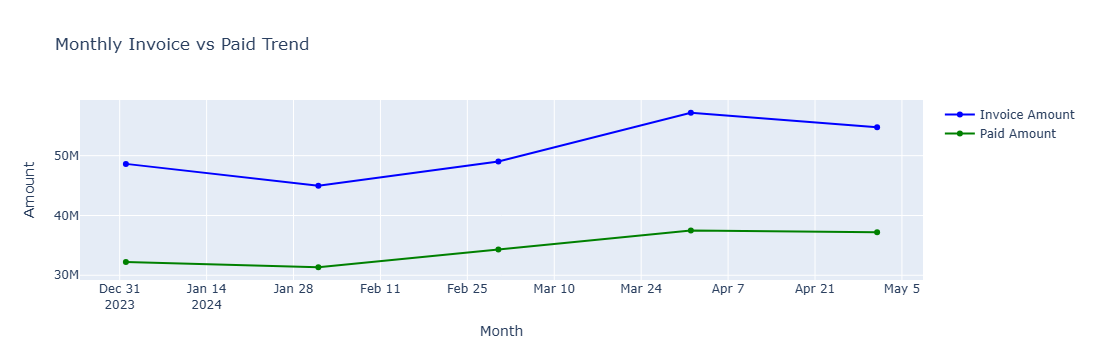

In [3]:
# Monthly Invoice vs Paid Trend

monthly_data = df.groupby("Month")[["Invoice_Amount", "Paid_Amount"]].sum().reset_index()

fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=monthly_data["Month"], y=monthly_data["Invoice_Amount"],
                          mode='lines+markers', name='Invoice Amount', line=dict(color='blue')))
fig4.add_trace(go.Scatter(x=monthly_data["Month"], y=monthly_data["Paid_Amount"],
                          mode='lines+markers', name='Paid Amount', line=dict(color='green')))
fig4.update_layout(title="Monthly Invoice vs Paid Trend", xaxis_title="Month", yaxis_title="Amount")
fig4.show()


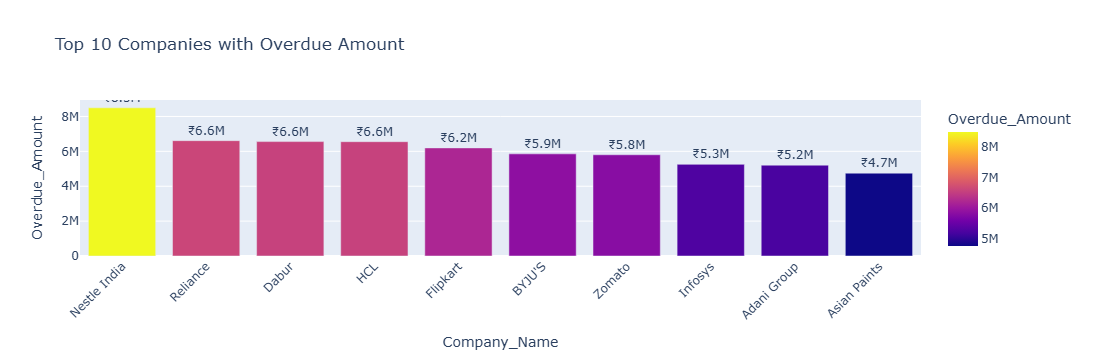

In [4]:
#  Top 10 Companies with Overdue Amount

top_overdue = df[df["Status"] == "Overdue"].groupby("Company_Name")["Overdue_Amount"] \
                .sum().sort_values(ascending=False).head(10).reset_index()

fig5 = px.bar(top_overdue, x="Company_Name", y="Overdue_Amount", text="Overdue_Amount",
              title="Top 10 Companies with Overdue Amount", color="Overdue_Amount")
fig5.update_traces(texttemplate='₹%{text:.2s}', textposition='outside')
fig5.update_layout(xaxis_tickangle=-45)
fig5.show()


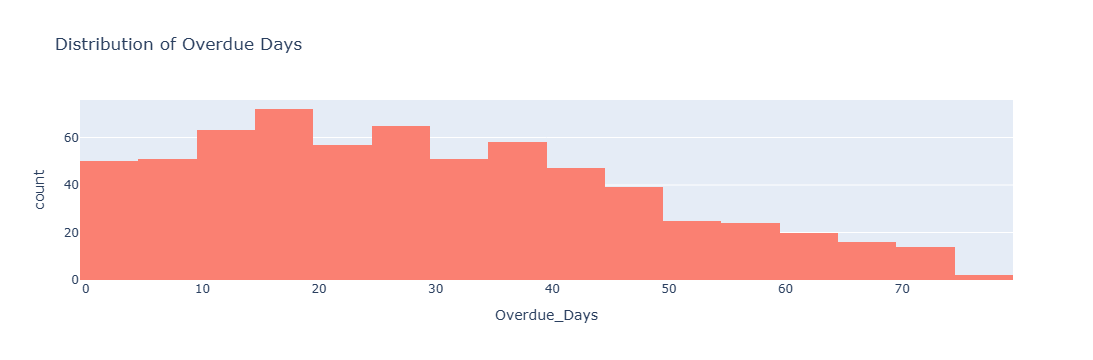

In [5]:
# Distribution of Overdue Days

fig6 = px.histogram(df[df["Overdue_Days"] > 0], x="Overdue_Days", nbins=30,
                    title="Distribution of Overdue Days", color_discrete_sequence=['salmon'])
fig6.show()


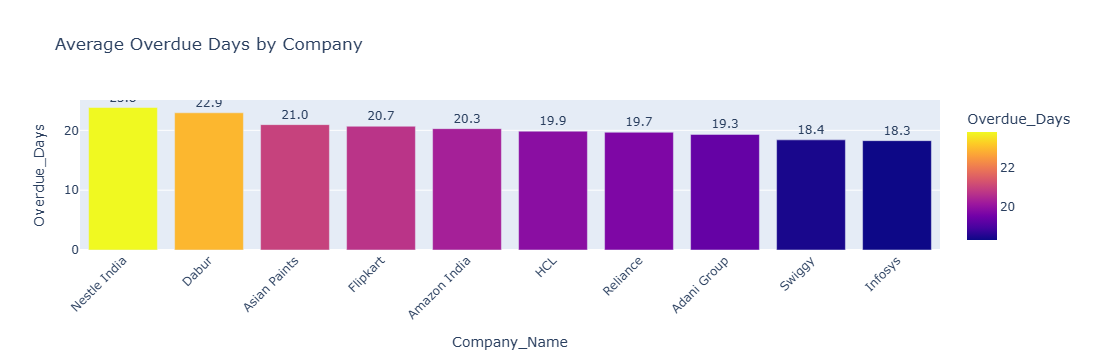

In [6]:
#  Average Delay in Payment by Company

avg_delay = df.groupby("Company_Name")["Overdue_Days"].mean().sort_values(ascending=False).head(10).reset_index()

fig7 = px.bar(avg_delay, x="Company_Name", y="Overdue_Days", text="Overdue_Days",
              title="Average Overdue Days by Company", color="Overdue_Days")
fig7.update_traces(texttemplate='%{text:.1f}', textposition='outside')
fig7.update_layout(xaxis_tickangle=-45)
fig7.show()
